### From Scratch Implemetation of a Simple Perceptron
### Author: @Samashi47

### Imports

In [56]:
from perceptron import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load breast cancer dataset 

In [57]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = pd.Series(cancer.target)
print(df_cancer)
print(df_cancer.columns.get_loc('mean texture'))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Fitting the Perceptron model

In [59]:
perceptron = Perceptron(epochs=2000, alpha=0.01)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

c:\Users\ah-ma\Documents\GitHub\Multi-Layer-Perceptron\perceptron.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


### Classification report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.93      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix heatmap plot

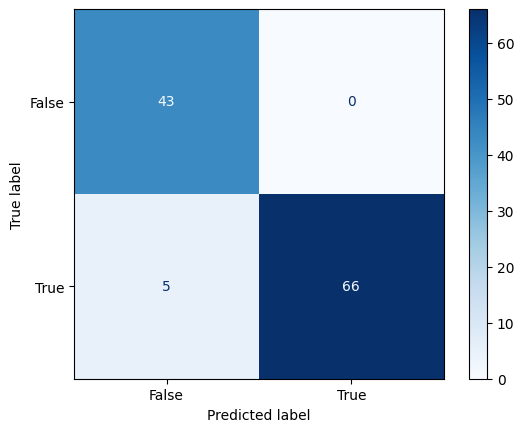

In [61]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels=["False", "True"], cmap='Blues')
plt.show()

### ROC Curve

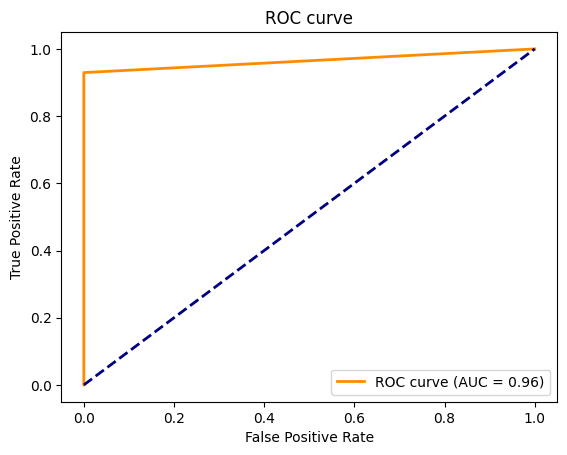

In [62]:
# Calculer FP ratio, TP ratio
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()